# TSNE

+ `t-SNE`, or t-Distributed Stochastic Neighbor Embedding, 

    - is a `dimensionality reduction` technique used for visualizing `high-dimensional data in a lower-dimensional` space. It is particularly useful for visualizing `complex, nonlinear relationships` in the data.

!["tsne_1"](imgs/tsne_1.png)

+ When projecting (اسقاط) points on the x or y axis will make merge or combination between `3 clusters` and we can't see `distance` between clusters.

+ `info` is `distance`, then we can't see any `info` in data!

+ so we can use `TSNE` to solve this problem.

!["tsne_2"](imgs/tsne_2.png)

+ we have two features that are `F1 and F2` and we want to create a `new feature` combination between them.

+ first plot `distance or proximity matrix` and `rank points` in matrix and get `distance` between `every point` with `all other points`.

+ we see that say points (`p1`, `p2`, `p3` and `p4`) are `near each other` and `furthest from other points` (`p5`, `p6` and `pn` ....).

+ and plot normal distribution and make normalization for points to scale of data not effect in normal distribution

!["tsne_3"](imgs/tsne_3.png)

+ project (اسقاط) points on the axis-x

+ collect `nearest neighbors` (which are in `same cluster`) and move other points to nearest other cluster based on `distance` in `proximity matrix` 

+ we can control in number of nearest neighbors which will move to them using parameter `perplexity`.`

+ EXAMPLE: 
    + Before ..
    + !["tsne_4"](imgs/tsne_4.png)

    + After ..
    + !["tsne_5"](imgs/tsne_5.png)

TSNE: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

+ Parameters

- `n_components` : int, `default=2`
    - Dimension of the embedded space.

- `perplexity` : float, `default=30.0`
    - The perplexity is related to the `number of nearest neighbors` that is used in other manifold learning algorithms. `Larger datasets` usually require a `larger perplexity`. Consider selecting a value `between 5 and 50`. Different values can result in significantly different results. The perplexity must be less than the number of samples.

- `n_iter` : int, `default=1000`
    - Maximum `number of iterations to nearest neighbors` for the optimization. Should be at least 250.

- `n_iter_without_progress` : int, `default=300`
    - Maximum `number of iterations without moving to neighbors points` before we abort the optimization, used after 250 initial iterations with early exaggeration. Note that progress is only checked every 50 iterations so this value is rounded to the next multiple of 50.

- same early stop in gradient descent

- `metric` : str or callable, `default=’euclidean’`
    - The metric to use when `calculating distance` (to `plot proximity matrix`) between instances in a feature array. If metric is a string, it must be one of the options allowed by scipy.spatial.distance.pdist for its metric parameter, or a metric listed in pairwise.PAIRWISE_DISTANCE_FUNCTIONS. If metric is “precomputed”, X is assumed to be a distance matrix. Alternatively, if metric is a callable function, it is called on each pair of instances (rows) and the resulting value recorded. The callable should take two arrays from X as input and return a value indicating the distance between them. The default is “euclidean” which is interpreted as squared euclidean distance.

- `init` : {“random”, “pca”} or ndarray of shape (n_samples, n_components), `default=”pca”`
    - make random initialization in case use value 
        - pca : `run pca` then make project points on axis-x then `enhance this initialization`. (that is fast from random)
        - random 

    - Initialization of embedding. PCA initialization cannot be used with precomputed distances and is usually more globally stable than random initialization.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.drop("Id", axis=1, inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
import seaborn as sns

c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


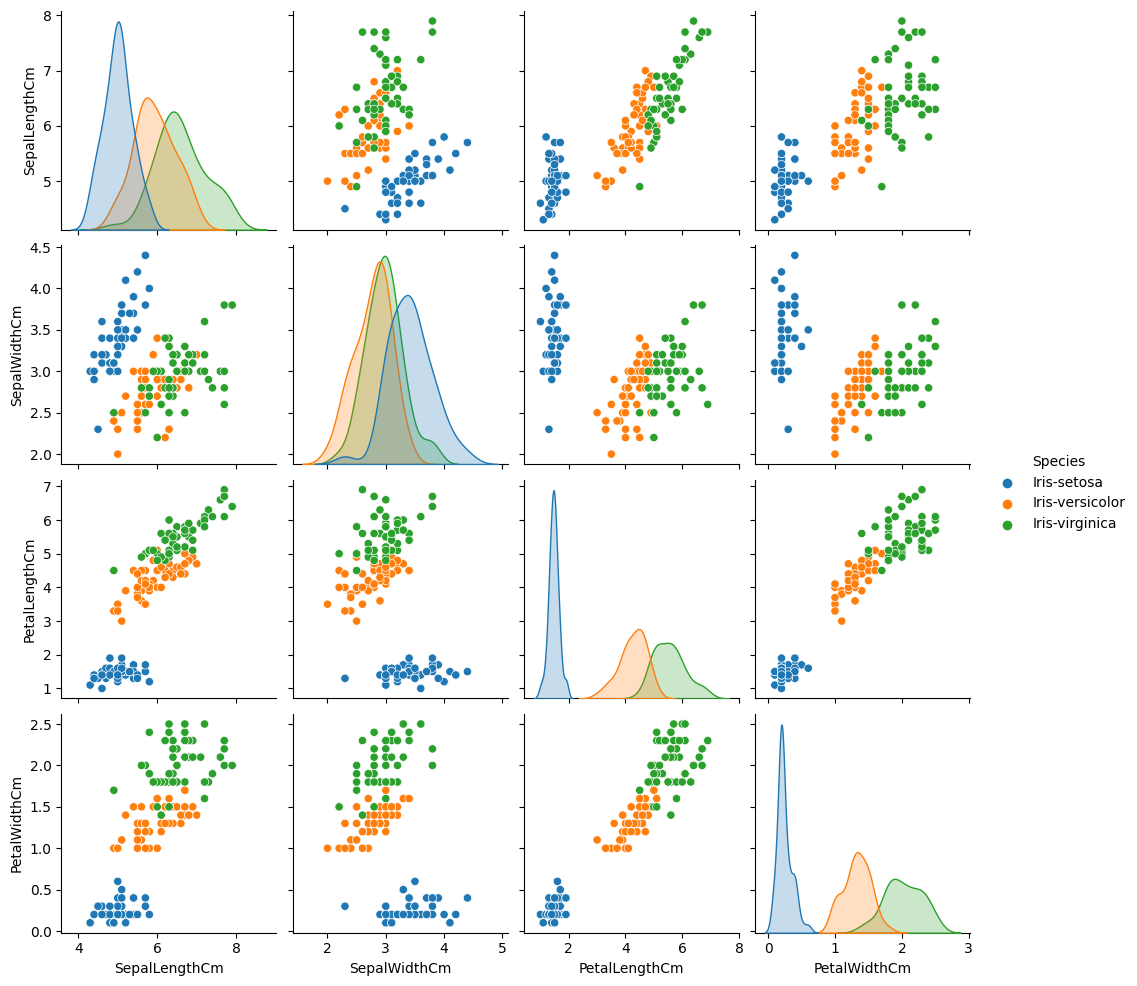

In [6]:
sns.pairplot(df, hue="Species")

must be make scaling for data before use `TSNE`

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
x = df.drop("Species", axis=1)
y = df['Species']

In [9]:
x_scl = StandardScaler().fit_transform(x)
x_scl.shape

(150, 4)

In [10]:
from sklearn.manifold import TSNE

use default parameters

In [11]:
tsne = TSNE()
tsne

TSNE()

In [19]:
x_tsne = tsne.fit_transform(x_scl)
x_tsne.shape

(150, 2)

we see `TSNE` return `2 features`, because default parameter for `n_components` = 2.

Now, we want to see names of features, so we use method `get_feature_names_out`.

In [22]:
tsne.get_feature_names_out()

array(['tsne0', 'tsne1'], dtype=object)

PLot TSNE

In [25]:
df_tsne = pd.DataFrame(x_tsne, columns=tsne.get_feature_names_out())
df_tsne.head()

,tsne0,tsne1
0,-25.699791,-0.439400
1,-21.746485,-0.807766
2,-22.975805,0.148431
3,-22.169785,0.283558
4,-26.242918,0.118761


In [26]:
df_tsne['Species'] = df['Species']
df_tsne.head()

,tsne0,tsne1,Species
0,-25.699791,-0.439400,Iris-setosa
1,-21.746485,-0.807766,Iris-setosa
2,-22.975805,0.148431,Iris-setosa
3,-22.169785,0.283558,Iris-setosa
4,-26.242918,0.118761,Iris-setosa


c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


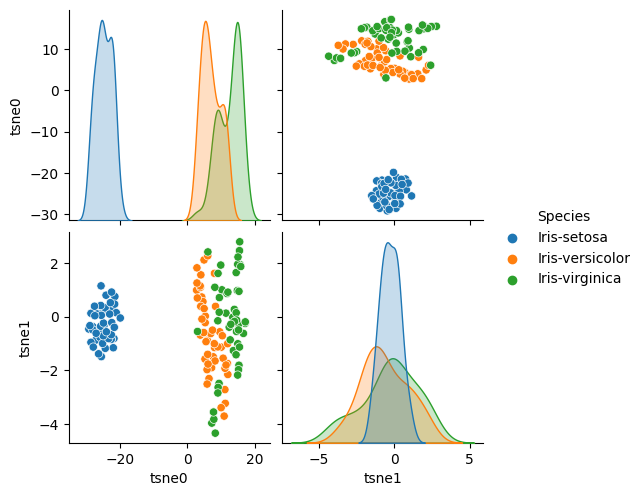

In [27]:
sns.pairplot(df_tsne, hue='Species')

+ result not good because of use default `perplexity = 30` and we have only `150 points in dataset` !!

SO now we change parameter `perplexity`

c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


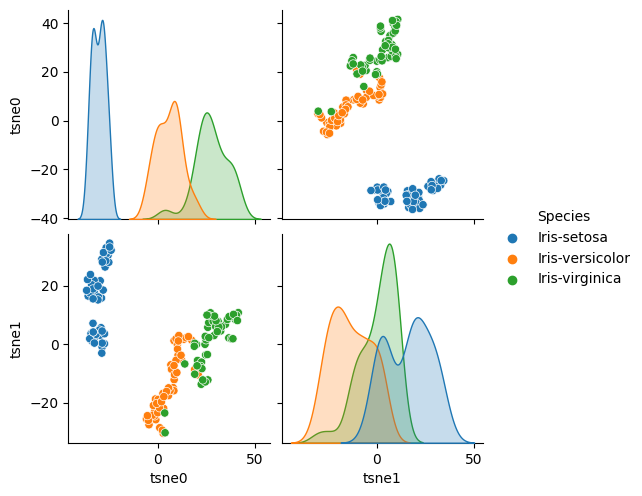

In [28]:
tsne = TSNE(perplexity=10)
x_tsne = tsne.fit_transform(x_scl)
df_tsne = pd.DataFrame(x_tsne, columns=tsne.get_feature_names_out())
df_tsne['Species'] = df['Species']
sns.pairplot(df_tsne, hue='Species')

now we see `good results` when `minimizing perplexity`.

c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


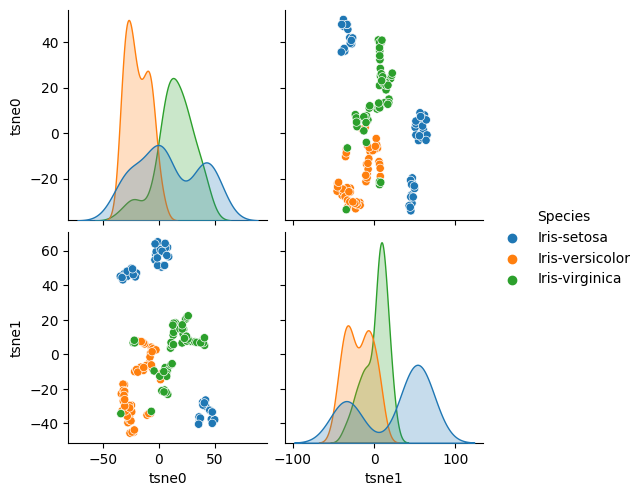

In [29]:
tsne = TSNE(perplexity=5)
x_tsne = tsne.fit_transform(x_scl)
df_tsne = pd.DataFrame(x_tsne, columns=tsne.get_feature_names_out())
df_tsne['Species'] = df['Species']
sns.pairplot(df_tsne, hue='Species')

but look that `perplexity` when `minimize more` we divide `one cluster` into `small clusters`

some we have foucs on `perplexity` in case `large dataset` is used `high perplexity` and in case `small dataset` is used `low perplexity`.